In [ ]:
import time
import matplotlib.pyplot as plt
import math
import sys
import csv

sys.setrecursionlimit(5000)

def soma_iterativa(n):
    total = 0
    for i in range(1, n + 1):
        total += i
    return total

#soma iterativa com sleep para evidenciar
#a diferença no calculo de tempo real e tempo de cpu
def soma_iterativa_sleep(n):
    total = 0
    for i in range(1, n + 1):
        total += i
    time.sleep(0.0003)
    return total

def soma_recursiva(n):
    if n == 1:
        return 1
    return n + soma_recursiva(n - 1)

def soma_formula(n):
    return n * (n + 1) // 2

def fatorial_iterativo(n):
    resultado = 1
    for i in range(2, n + 1):
        resultado *= i
    return resultado

def fatorial_recursivo(n):
    if n <= 1:
        return 1
    return n * fatorial_recursivo(n - 1)

def busca_linear(lista, alvo):
    for elemento in lista:
        if elemento == alvo:
            return True
    return False

def busca_binaria(lista, alvo):
    esquerda, direita = 0, len(lista) - 1
    while esquerda <= direita:
        meio = (esquerda + direita) // 2
        if lista[meio] == alvo:
            return True
        elif lista[meio] < alvo:
            esquerda = meio + 1
        else:
            direita = meio - 1
    return False

def numero_primo(n):
    if n <= 1:
        return False
    for i in range(2, int(math.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True

In [ ]:
def medir_tempo(func, entradas, *args):
    tempo_real = []
    tempo_cpu = []
    for n in entradas:
        inicio_real = time.time()
        inicio_cpu = time.process_time()
        func(n, *args) if args else func(n)
        fim_real = time.time()
        fim_cpu = time.process_time()
        tempo_real.append(fim_real - inicio_real)
        tempo_cpu.append(fim_cpu - inicio_cpu)
    return tempo_real, tempo_cpu

entradas = [10, 100, 500, 1000, 3000]

tempo_real_soma_iter, tempo_cpu_soma_iter = medir_tempo(soma_iterativa, entradas)
tempo_real_soma_rec, tempo_cpu_soma_rec = medir_tempo(soma_recursiva, entradas)
tempo_real_soma_formula, tempo_cpu_soma_formula = medir_tempo(soma_formula, entradas)
tempo_real_soma_iter_sleep, tempo_cpu_soma_iter_sleep = medir_tempo(soma_iterativa_sleep, entradas)

tempo_real_fat_iter, tempo_cpu_fat_iter = medir_tempo(fatorial_iterativo, entradas)
tempo_real_fat_rec, tempo_cpu_fat_rec = medir_tempo(fatorial_recursivo, entradas)

tempo_real_busca_linear, tempo_cpu_busca_linear = medir_tempo(lambda n: busca_linear(list(range(n)), n - 1), entradas)
tempo_real_busca_binaria, tempo_cpu_busca_binaria = medir_tempo(lambda n: busca_binaria(list(range(n)), n - 1), entradas)

tempo_real_primo, tempo_cpu_primo = medir_tempo(numero_primo, entradas)

In [ ]:
def plotar_grafico(entradas, tempos, titulo, labels):
    plt.figure(figsize=(8, 5))
    for t, label in zip(tempos, labels):
      plt.plot(entradas, t, marker='o', label=label)
    plt.xlabel('Tamanho da entrada (n)')
    plt.ylabel('Tempo (s)')
    plt.title(titulo)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

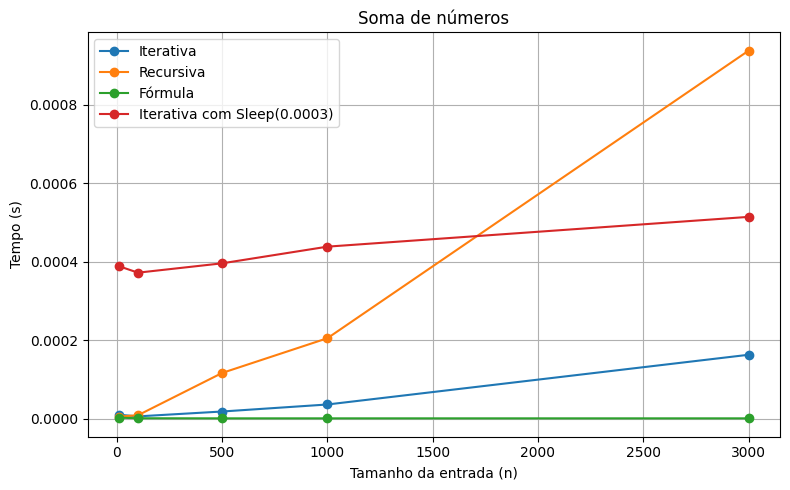

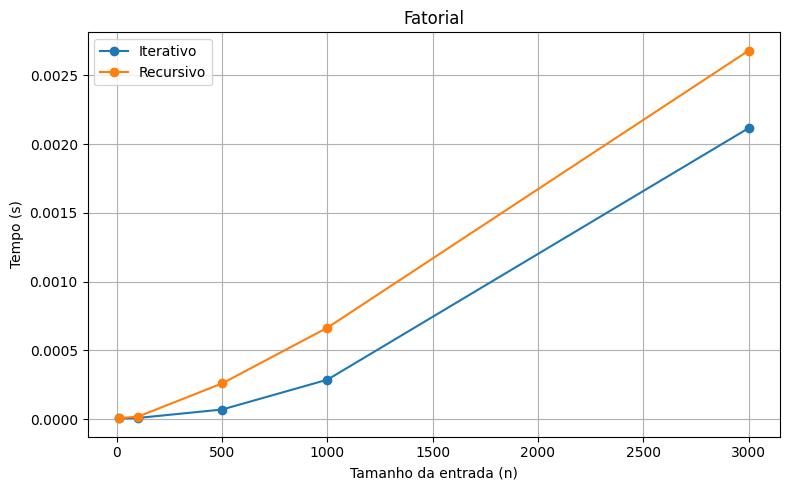

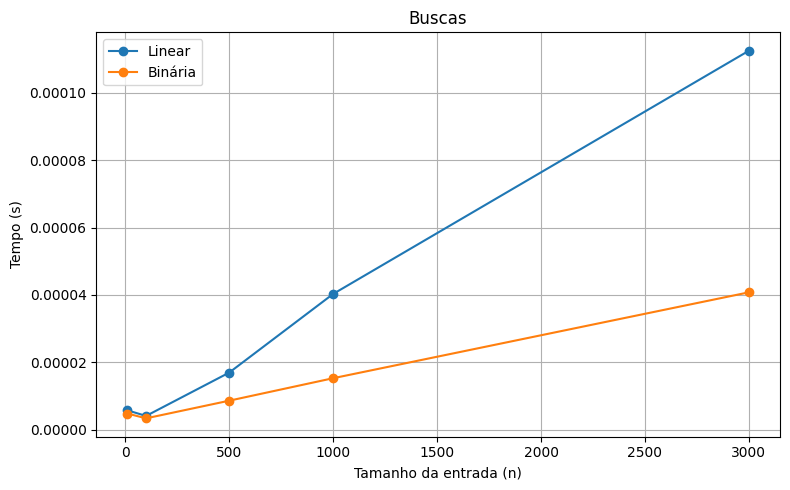

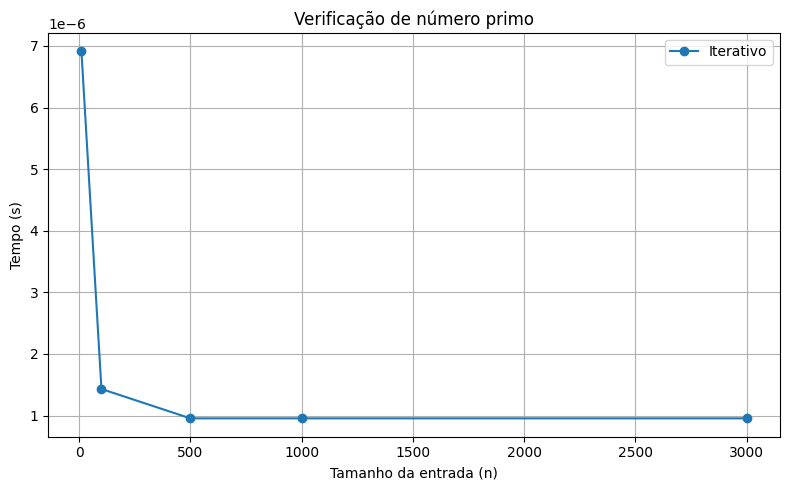

In [ ]:
plotar_grafico(entradas, [tempo_real_soma_iter, tempo_real_soma_rec, tempo_real_soma_formula, tempo_real_soma_iter_sleep],
               "Soma de números", ["Iterativa", "Recursiva", "Fórmula", "Iterativa com Sleep(0.0003)"])

plotar_grafico(entradas, [tempo_real_fat_iter, tempo_real_fat_rec],
               "Fatorial", ["Iterativo", "Recursivo"])

plotar_grafico(entradas, [tempo_real_busca_linear, tempo_real_busca_binaria],
               "Buscas", ["Linear", "Binária"])

plotar_grafico(entradas, [tempo_real_primo,],
               "Verificação de número primo", ["Iterativo"])

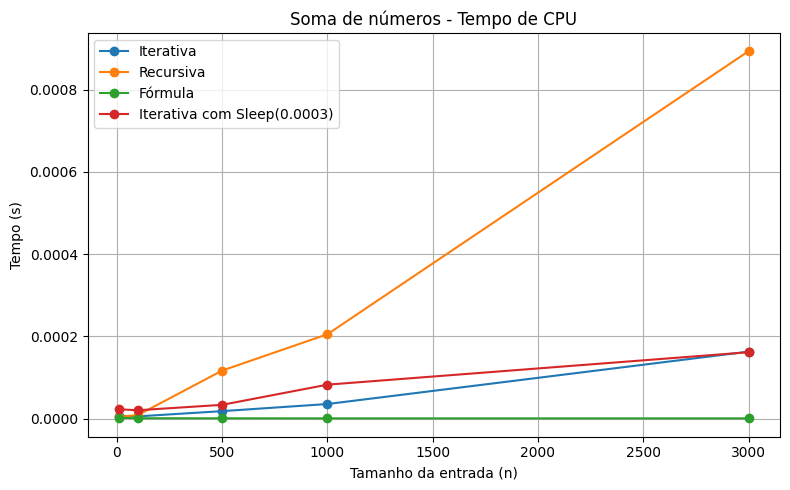

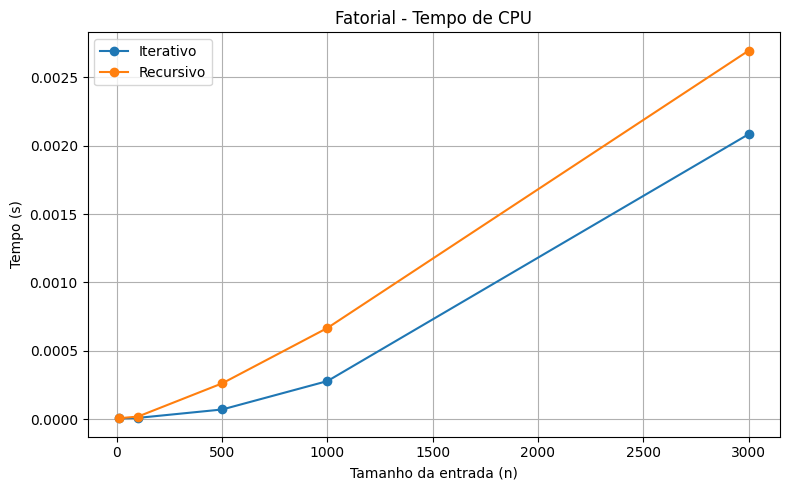

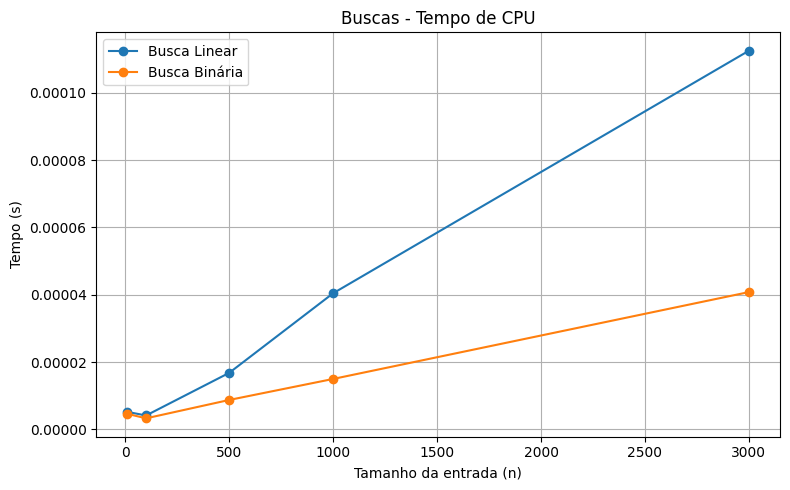

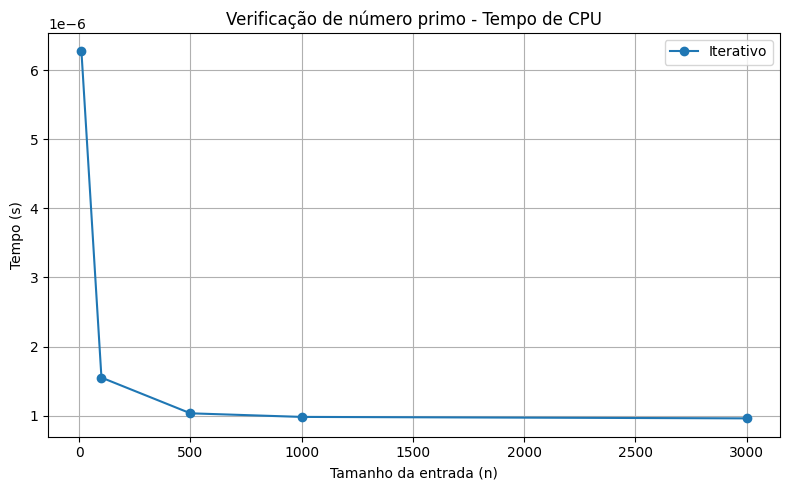

In [ ]:
plotar_grafico(
    entradas,
    [tempo_cpu_soma_iter, tempo_cpu_soma_rec, tempo_cpu_soma_formula, tempo_cpu_soma_iter_sleep],
    "Soma de números - Tempo de CPU",
    ["Iterativa", "Recursiva", "Fórmula", "Iterativa com Sleep(0.0003)"]
)

plotar_grafico(
    entradas,
    [tempo_cpu_fat_iter, tempo_cpu_fat_rec],
    "Fatorial - Tempo de CPU",
    ["Iterativo", "Recursivo"]
)

plotar_grafico(
    entradas,
    [tempo_cpu_busca_linear, tempo_cpu_busca_binaria],
    "Buscas - Tempo de CPU",
    ["Busca Linear", "Busca Binária"]
)

plotar_grafico(
    entradas,
    [tempo_cpu_primo],
    "Verificação de número primo - Tempo de CPU",
    ["Iterativo"]
)

In [ ]:
def salvar_csv(nome_arquivo, entradas, resultados, labels, titulo):
    """
    resultados: lista de listas, cada uma com tempos (real/cpu)
    labels: nomes das funções
    """
    with open(nome_arquivo, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["Categoria", "Função", "Entrada", "Tempo Real (s)", "Tempo CPU (s)"])
        for i, label in enumerate(labels):
            tempo_real, tempo_cpu = resultados[i]
            for entrada, tr, tc in zip(entradas, tempo_real, tempo_cpu):
                writer.writerow([titulo, label, entrada, tr, tc])

salvar_csv(
    "resultados_soma.csv",
    entradas,
    [
        (tempo_real_soma_iter, tempo_cpu_soma_iter),
        (tempo_real_soma_rec, tempo_cpu_soma_rec),
        (tempo_real_soma_formula, tempo_cpu_soma_formula),
        (tempo_real_soma_iter_sleep, tempo_cpu_soma_iter_sleep),
    ],
    ["Iterativa", "Recursiva", "Fórmula", "Iterativa com Sleep(0.0003)"],
    titulo="Soma de Números"
)